<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  1000 non-null   float64
 1   humidity     1000 non-null   float64
 2   vibration    1000 non-null   float64
 3   status       1000 non-null   object 
dtypes: float64(3), object(1)
memory usage: 31.4+ KB
['critical' 'normal' 'warning']
Accuracy: 0.92
[[  7   0   2]
 [  0 135   1]
 [  0  13  42]]


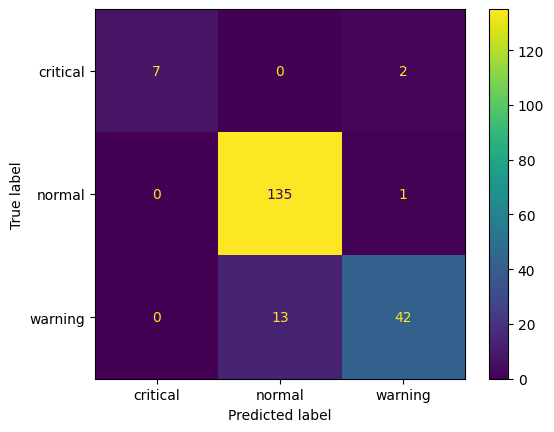

In [87]:
#importing the required libraries

from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

# Loading the CSV file into a pandas DataFrame
# The pandas library is used for data manipulation and analysis
# The read_csv function is used to read a CSV file and convert it into a DataFrame
# The DataFrame is a two-dimensional, size-mutable, potentially heterogeneous tabular data structure
# The DataFrame is similar to a spreadsheet or SQL table
# The DataFrame is used to store and manipulate data in a structured format
file_path = '/Users/omarcruz/Downloads/sensor_status_data.csv'
df = pd.read_csv(file_path)

# Display a bit of information about the dataframe
# The info method is used to display a summary of the DataFrame
# The info method shows the number of rows and columns, the data types of each column,
# and the number of non-null values in each column
df.info()
# Display the first few rows of the DataFrame
# The head method is used to display the first few rows of the DataFrame
# The head method shows the first 5 rows by default
# The head method is useful for quickly inspecting the data
# The head method shows the first few rows of the DataFrame
df.head()

#importing the required libraries
from sklearn.preprocessing import LabelEncoder

# Create encoder
# The LabelEncoder is used to convert categorical labels into numerical labels
# This is necessary for machine learning algorithms that require numerical input
encoder = LabelEncoder()

# defining the target variable, encoding the labels
# The target variable is the "status" column
# The LabelEncoder will convert the string labels into integers
# For example: 'normal' -> 0, 'warning' -> 1, 'critical' -> 2
# The encoder will learn the mapping from the unique values in the "status" column
# and transform the labels into integers
# The fit_transform method does both fitting and transforming in one step
y = encoder.fit_transform(df["status"])

# Check mapping
# The classes_ attribute of the encoder will show the mapping of the original labels to the encoded labels
# For example: ['critical', 'normal', 'warning'] becomes [0, 1, 2]
print(encoder.classes_)


# Selecting features
# The features are the columns that will be used to predict the target variable
# In this case, we are using "temperature", "humidity", and "vibration" as features
# These features are expected to have some correlation with the "status" of the sensors
# The features are the input variables for the machine learning model
# The target variable is the output variable that we want to predict
# The features are selected from the DataFrame df
X = df[["temperature", "humidity", "vibration"]]

# Splitting the dataset into training and testing sets
# The train_test_split function is used to split the dataset into training and testing sets
# The training set is used to train the machine learning model
# The testing set is used to evaluate the performance of the model
# The test_size parameter specifies the proportion of the dataset to include in the test split
# The random_state parameter is used to seed the random number generator for reproducibility
# The stratify parameter is used to ensure that the class distribution in the training and testing sets is similar
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Importing the KNeighborsClassifier
# The KNeighborsClassifier is a machine learning algorithm that classifies data points based on their proximity to other data points
# It is a type of instance-based learning, where the model makes predictions based on the training data
# The KNeighborsClassifier uses the k-nearest neighbors algorithm to classify data points
# The n_neighbors parameter specifies the number of neighbors to consider when making predictions
# The default value is 5, but we are using 3 neighbors in this case
# The KNeighborsClassifier is a simple and effective algorithm for classification tasks
# It is particularly useful for small datasets and when the decision boundary is not too complex

from sklearn.neighbors import KNeighborsClassifier

# Creating the KNN classifier
# The KNeighborsClassifier is initialized with the number of neighbors to consider
# In this case, we are using 3 neighbors
# The KNeighborsClassifier will use the training data to learn the relationships between the features and the target variable
# The KNeighborsClassifier will use the Euclidean distance to measure the distance between data points
# The KNeighborsClassifier will use the majority class among the k nearest neighbors to make predictions
# Creating the KNeighborsClassifier with X neighbors
knn = KNeighborsClassifier(n_neighbors=3)

# Fitting the classifier to the training data
# The fit method is used to train the KNeighborsClassifier on the training data
# The fit method takes the training features (X_train) and the training labels (y_train) as input
# The KNeighborsClassifier will learn the relationships between the features and the target variable
# The KNeighborsClassifier will store the training data in memory
# The KNeighborsClassifier will use the training data to make predictions on new data
knn.fit(X_train, y_train)

# Making predictions on the test data
# The predict method is used to make predictions on the test data
# The predict method takes the test features (X_test) as input
# The KNeighborsClassifier will use the training data to make predictions on the test data
y_pred = knn.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))


from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=encoder.classes_)

